In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':[10,10]},font_scale=1.3)
sns.set_palette('viridis')

In [2]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


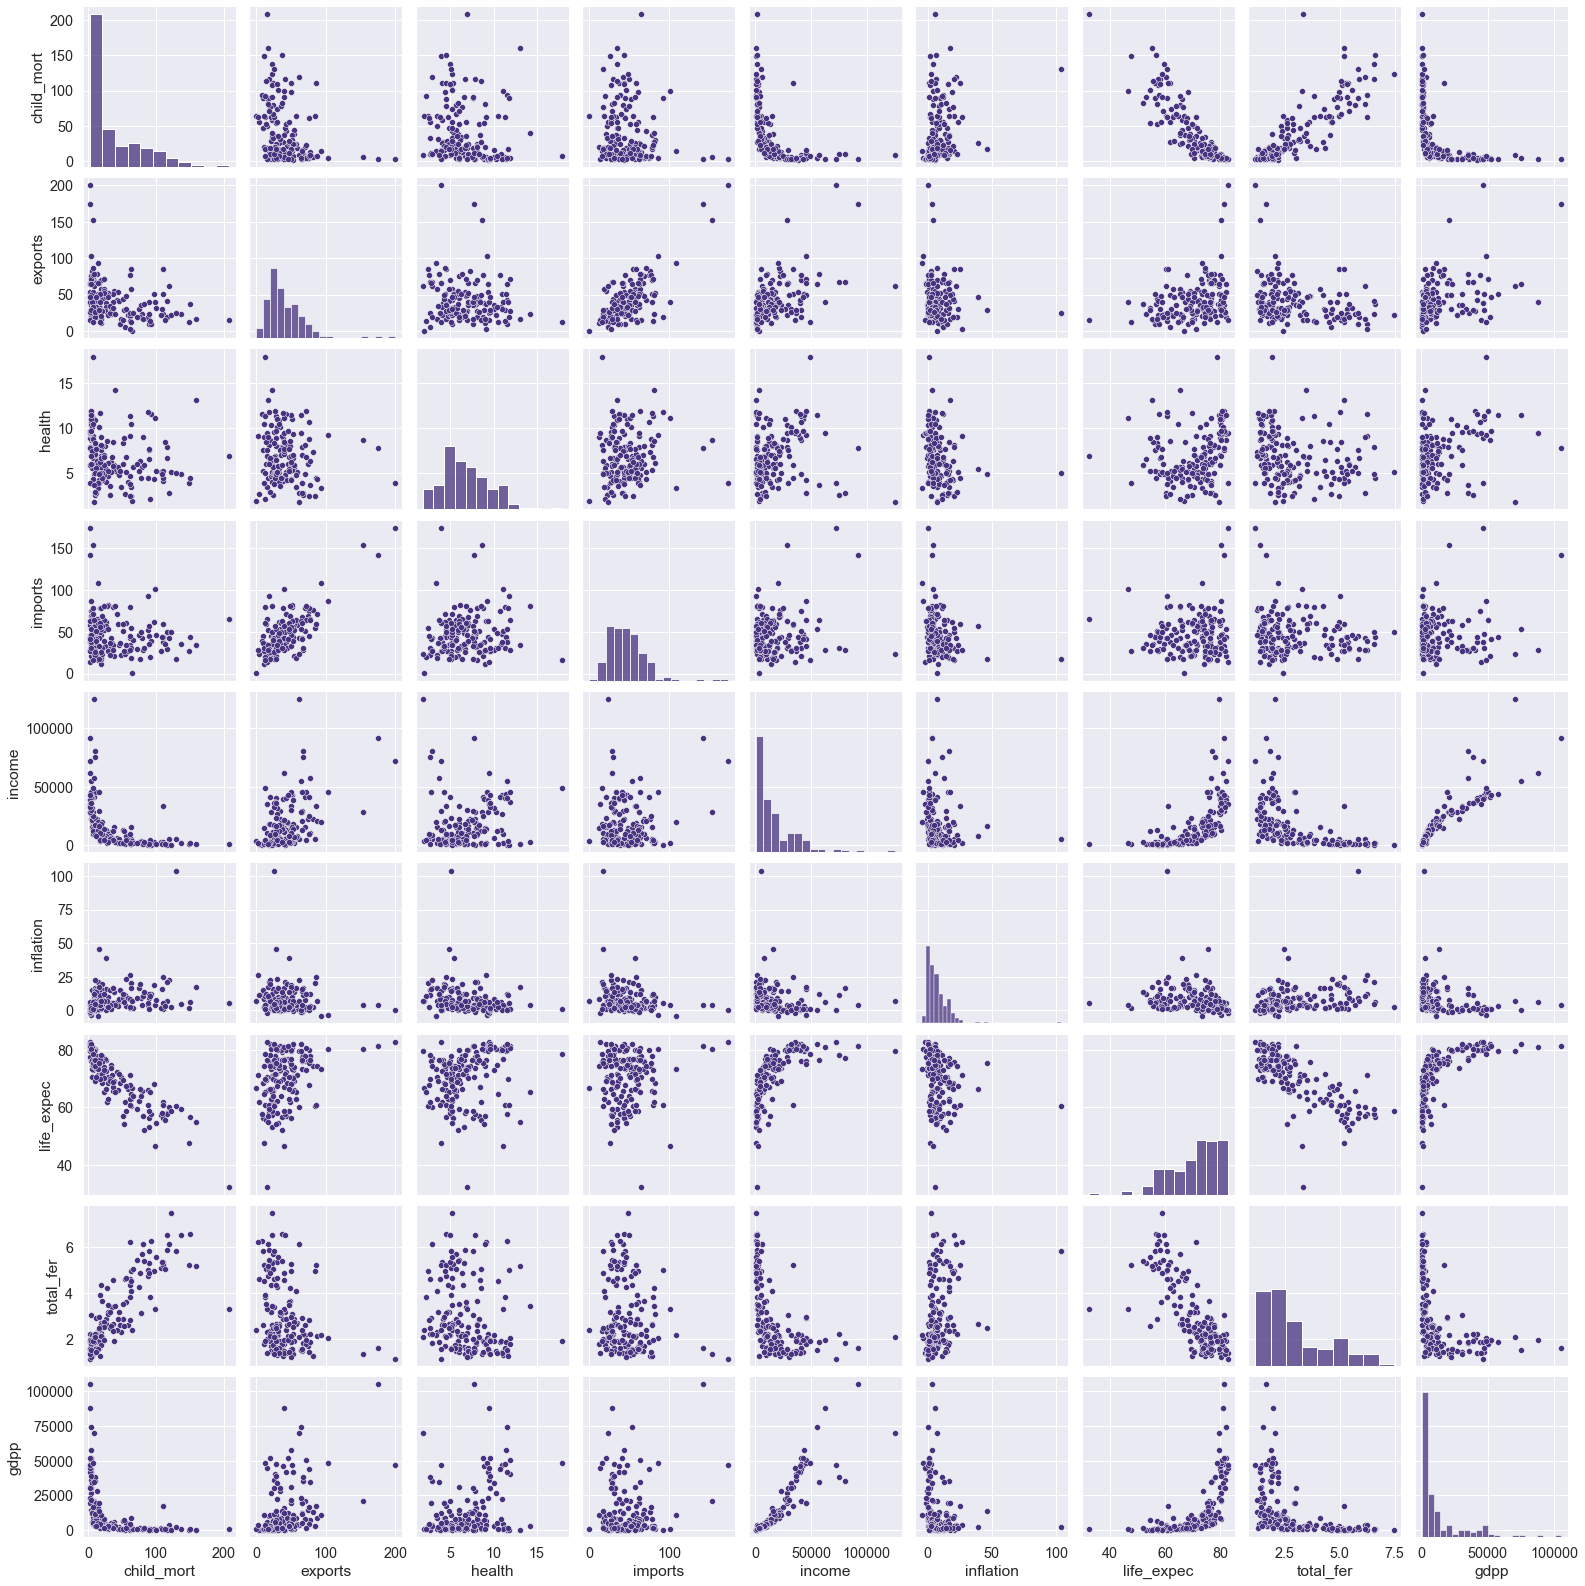

In [5]:
sns.pairplot(df)

<AxesSubplot:>

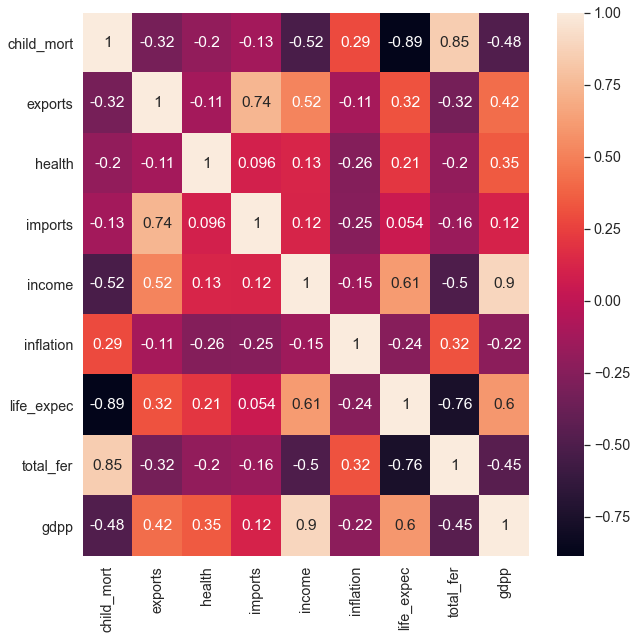

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
country = df['country']
df = df.drop('country',axis=1)
x = df.copy()

In [8]:
scaled_data = StandardScaler().fit_transform(x)

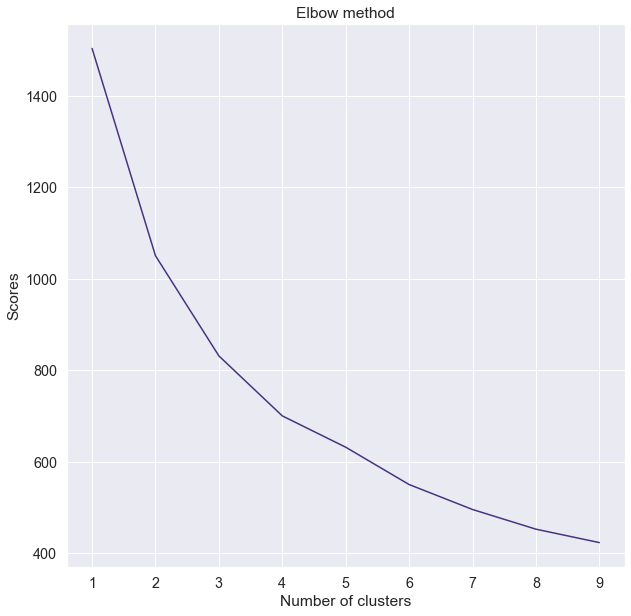

In [9]:
scores = []
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(scaled_data)
    scores.append(model.inertia_)
    
plt.plot(range(1,10),scores)
plt.title('Elbow method')
plt.ylabel('Scores')
plt.xlabel('Number of clusters')
plt.show()

In [10]:
model = KMeans(n_clusters=3)
clusters = model.fit_predict(scaled_data)

In [11]:
df['country'] = country
df['clusters'] = clusters
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Afghanistan,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Albania,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Algeria,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Angola,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,2
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Vanuatu,2
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Venezuela,2
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Vietnam,2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Yemen,1


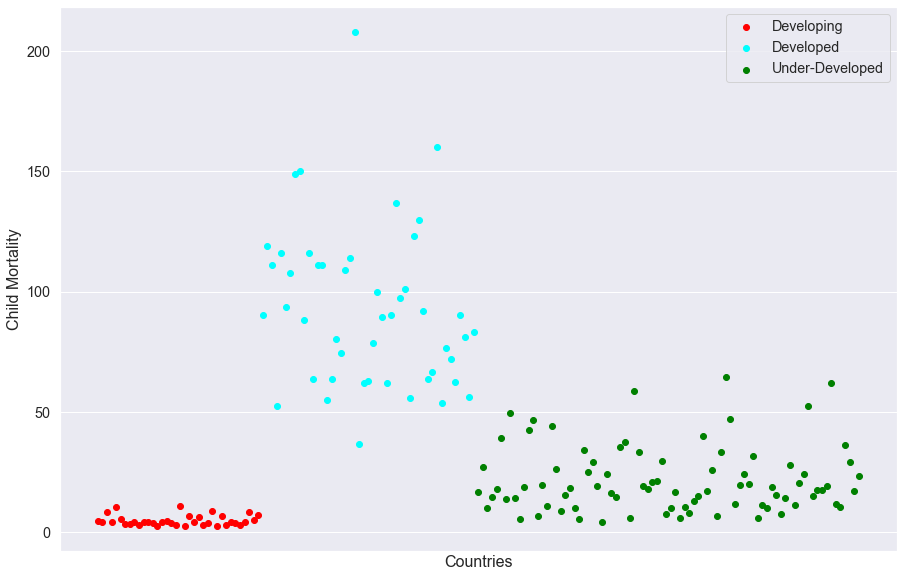

In [12]:
plt.figure(figsize=(15,10))
plt.xticks([])
plt.scatter(df.country[df.clusters==0],df.child_mort[df.clusters==0],color='red')
plt.scatter(df.country[df.clusters==1],df.child_mort[df.clusters==1],color='cyan')
plt.scatter(df.country[df.clusters==2],df.child_mort[df.clusters==2],color='green')
plt.xlabel('Countries',size=16)
plt.ylabel('Child Mortality',size=16)
plt.legend(['Developing','Developed','Under-Developed'])